In [ ]:
# DATA SCIENCE INTERN @BHARAT INTERN

In [ ]:
### AUTHOR : Shweta Santosh Kapile

In [ ]:
# TASK 2 : NUMBER RECOGNITION

**Import the necessary libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils


**Load and preprocess the MNIST dataset**

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten the input images from 28x28 pixels to 784-dimensional vectors
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')

# Normalize the pixel values between 0 and 1
X_train /= 255
X_test /= 255

# Convert the target labels to categorical one-hot encoding
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


11490434/11490434 [==============================] - 1s 0us/step


**Build the neural network model**

In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


**Train the model**

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)


Epoch 1/10
469/469 [==============================] - 14s 25ms/step - loss: 0.2488 - accuracy: 0.9254 - val_loss: 0.1067 - val_accuracy: 0.9662
Epoch 2/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1019 - accuracy: 0.9687 - val_loss: 0.0807 - val_accuracy: 0.9753
Epoch 3/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0722 - accuracy: 0.9778 - val_loss: 0.0719 - val_accuracy: 0.9776
Epoch 4/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0539 - accuracy: 0.9827 - val_loss: 0.0609 - val_accuracy: 0.9818
Epoch 5/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0464 - accuracy: 0.9852 - val_loss: 0.0650 - val_accuracy: 0.9808
Epoch 6/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0387 - accuracy: 0.9872 - val_loss: 0.0713 - val_accuracy: 0.9800
Epoch 7/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0361 - accuracy: 0.9878 - val_loss: 0.0659 - val_accuracy: 0

**Evaluate the model**

In [ ]:
accuracy = model.evaluate(X_test, y_test)[1]
print("Accuracy:", accuracy)


313/313 [==============================] - 2s 6ms/step - loss: 0.0646 - accuracy: 0.9819
Accuracy: 0.9818999767303467


**Plot the training history**

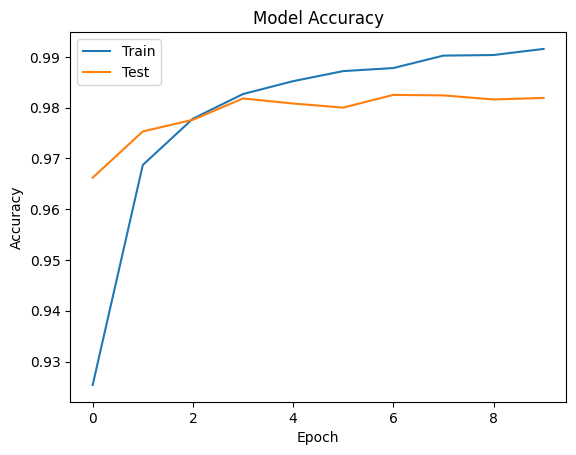

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


**Make predictions**

In [ ]:
# Predict on a single image
digit = X_test[0]
digit = np.expand_dims(digit, axis=0)
prediction = model.predict(digit)
predicted_class = np.argmax(prediction)
print("Predicted digit:", predicted_class)


1/1 [==============================] - 0s 98ms/step
Predicted digit: 7
